In [19]:
%matplotlib inline

import os
import numpy as np
from deepsign.rp.index import TrieSignIndex as Index
from deepsign.io.datasets.toefl import TOEFLReader
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from deepsign.utils.measure import cosine
import sklearn.preprocessing as process

# model params
k = 2000
s = 10
h_dim = 100

home = os.getenv("HOME")
data_dir = home + "/data/datasets/"
result_dir = home + "/data/results/5000sentences20epochs0001lr2000_10/"

model_suffix = "{k}_{s}_h{h}".format(k=k,s=s,h=h_dim)
index_file = result_dir + "index_"+model_suffix+".hdf5"
model_file = result_dir + "model_"+model_suffix
embeddings_file = result_dir + "embeddings_"+model_suffix+".npy"

In [20]:
# load index
index = Index.load(index_file)

In [21]:
# load embeddings
embeddings = np.load(embeddings_file)
embeddings = process.normalize(embeddings, norm='l2')

def get_vector(word):
    word_ri = index.get_ri(word).to_vector()
    return np.matmul(word_ri, embeddings)

In [22]:
vocab = index.sign_trie.keys()
len(vocab)

11816

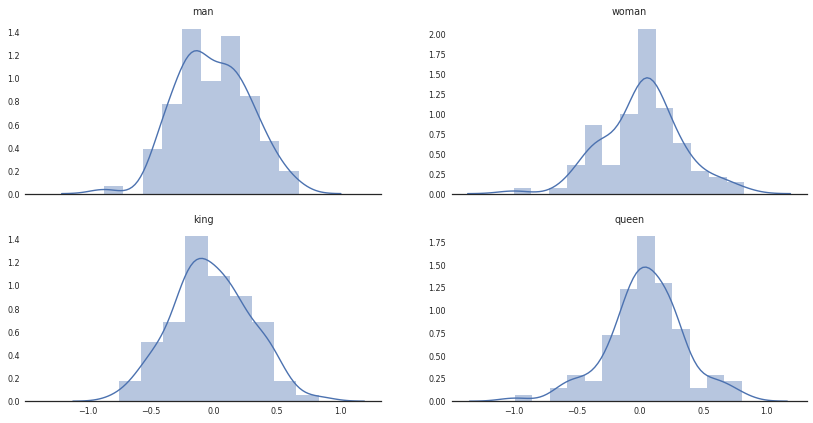

In [23]:
# are the weights healthy?

man = get_vector("man")
woman = get_vector("woman")

king = get_vector("king")
queen = get_vector("queen")


# setup figure
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True)
sns.despine(left=True)
sns.set(style="white", context="paper")

sns.distplot(man,ax=axes[0,0])
axes[0,0].set_title("man")
sns.distplot(woman,ax=axes[0,1])
axes[0,1].set_title("woman")
sns.distplot(king,ax=axes[1,0])
axes[1,0].set_title("king")
sns.distplot(queen,ax=axes[1,1])
axes[1,1].set_title("queen")

plt.savefig(result_dir+"embedding_dist.svg")

(4, 100)


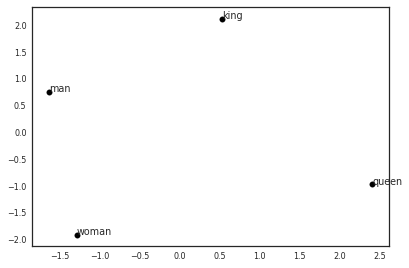

In [24]:
# this is bad depends on the corpus and model
words = [
    "man",
    "woman",
    "queen",
    "king"
]

vectors = np.array([get_vector(w) for w in words])
print(vectors.shape)

pca = PCA(n_components=2)
projection = pca.fit(vectors).transform(vectors)


sns.set(style="white", context="paper")
fig, ax = plt.subplots()
plt.scatter(projection[:,0],projection[:,1],color="black")

for i,text in enumerate(words):
    ax.annotate(text,(projection[i,0],projection[i,1]))
    
plt.savefig(result_dir+"analogy.svg")